In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Задание 1. 
### Определить два вектора, представляющие собой число автомобилей, припаккованных в течение 5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже.

In [2]:
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

### 1.1 Найти и интерпретировать корреляцию между переменными "Улица" и "Гараж" (подсчитать корреляцию по Пирсону).

In [3]:
np.corrcoef(street, garage)[0, 1]

-0.9999999999999998

### 1.2 Построить диаграмму рассеяния для вышеупомянутых переменных.

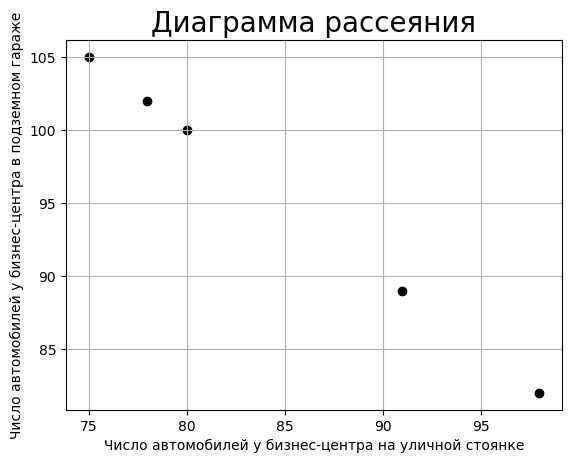

In [4]:
plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize = 20)
plt.xlabel('Число автомобилей у бизнес-центра на уличной стоянке')
plt.ylabel('Число автомобилей у бизнес-центра в подземном гараже')
plt.scatter(street, garage, color='black')
plt.show()

# Задание 2.
### Найти и выгрузить данные.

In [5]:
data = pd.read_csv('CrabAgePrediction.csv', sep=',')

In [6]:
data

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0      F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1      M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2      I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3      F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4      I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   
...   ..     ...       ...     ...        ...             ...             ...   
3888   F  1.4625    1.1375  0.3250  24.819987       11.651644        5.854172   
3889   F  1.5500    1.2125  0.4375  34.458817       15.450477        7.172423   
3890   I  0.6250    0.4625  0.1625   2.012815        0.765436        0.524466   
3891   I  1.0625    0.7750  0.2625  10.347568        4.507570        2.338834   
3892   I  0.7875    0.6125  0.2125   4.068153        1.502523        1.346601   

      Shell Weight  Age  
0         6.747181    9  
1         1.559222    6  
2         2.764076    6  
3         5.244657   10  
4         1.700970    6  
...            ...  ...  
3888      6.378637    8  
3889      9.780577   10  
3890      0.637864    5  
3891      2.976698    6  
3892      1.417475    8  

[3893 rows x 9 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


### Удаление лишних колонок

In [8]:
data = data.drop('Sex', axis = 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3893 non-null   float64
 1   Diameter        3893 non-null   float64
 2   Height          3893 non-null   float64
 3   Weight          3893 non-null   float64
 4   Shucked Weight  3893 non-null   float64
 5   Viscera Weight  3893 non-null   float64
 6   Shell Weight    3893 non-null   float64
 7   Age             3893 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 243.4 KB


### Проверка на наличие дубликатов

In [10]:
data.duplicated().sum()

0

### Проверка на наличие пустых значений

In [11]:
data.isna().sum()

Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

### Проверка на наличие выбросов

<Axes: >

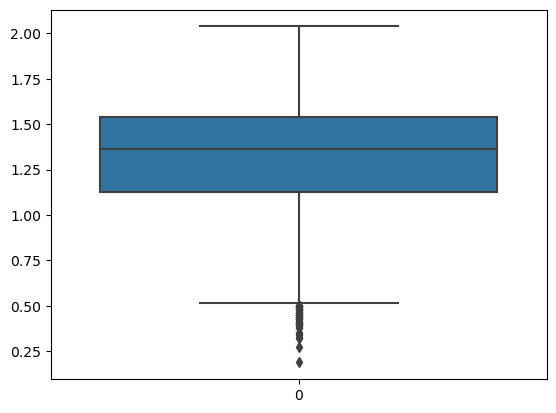

In [12]:
sns.boxplot(data=data.Length)

<Axes: >

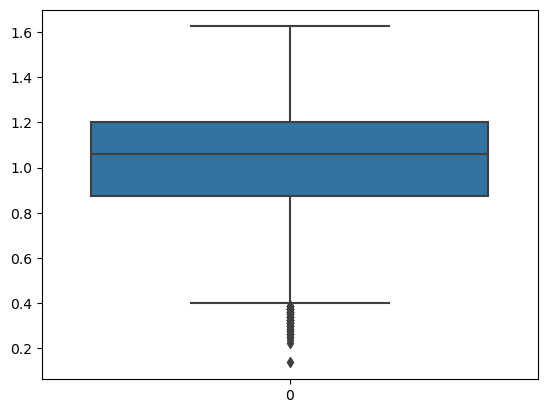

In [13]:
sns.boxplot(data=data.Diameter)

<Axes: >

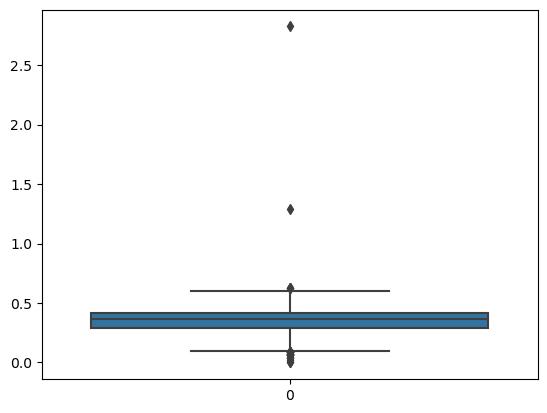

In [14]:
sns.boxplot(data=data.Height)

<Axes: >

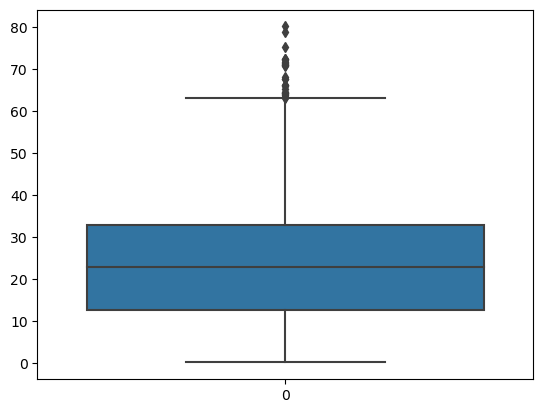

In [15]:
sns.boxplot(data=data.Weight)

<Axes: >

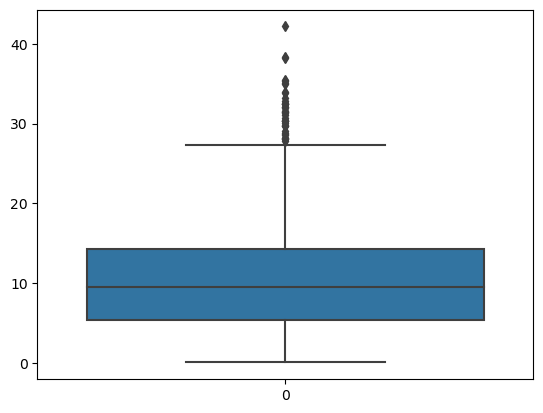

In [16]:
sns.boxplot(data=data['Shucked Weight'])

<Axes: >

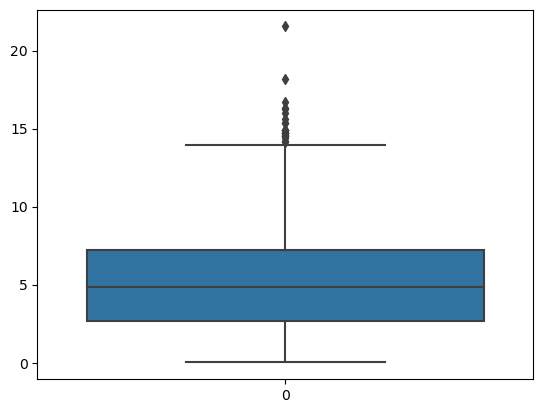

In [17]:
sns.boxplot(data=data['Viscera Weight'])

<Axes: >

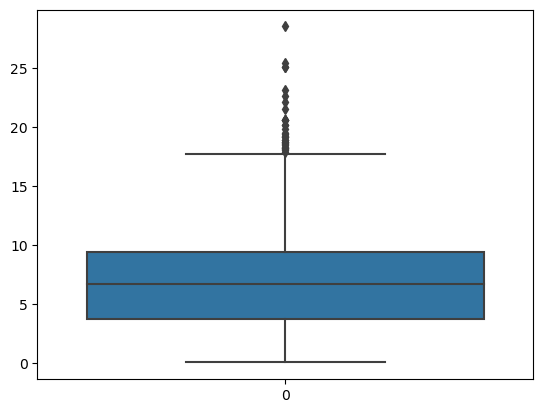

In [18]:
sns.boxplot(data=data['Shell Weight'])

<Axes: >

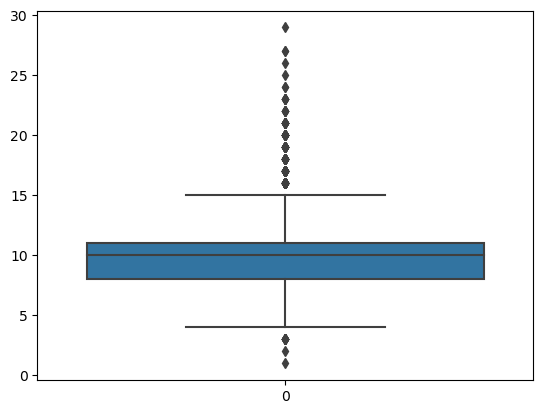

In [19]:
sns.boxplot(data=data.Age)

### 2.1 Построить корреляционную матрицу по одной целевой переменной. Определить наиболее коррелирующую переменную, продолжить с ней работу в следующем пункте.

In [20]:
corr_matrix = data.corr().Height.to_frame().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

### 2.2 Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE.

In [21]:
X = data[['Diameter']]
y = data[['Height']]
X = np.array(X, type(float))
y = np.array(y, type(float))

In [39]:
def mserror(x, w1, w0, y):
    y_pred = w1*x + w0
    return np.sum((y - y_pred)**2) / len(y_pred)

def gr_mserror (x, w1, w0, y):
    y_pred = w1*x + w0
    return np.array([-(2/len(x) * np.sum(y-y_pred)), 
                    -(2/len(x) * np.sum((y - y_pred) * x))])

In [56]:
eps = 0.000001

w1 = 0
w0 = 0

learning_rate = 0.001

next_w1 = w1
next_w0 = w0

n=100000
for i in range(n):
    cur_w1 = next_w1
    cur_w0 = next_w0

    next_w1 = cur_w1 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[1]
    next_w0 = cur_w0 - learning_rate * gr_mserror(X, cur_w1, cur_w0, y)[0]

    print(f"Итерация: {i}")
    print(f"Текущая точка: {cur_w1, cur_w0}| Следующая точка: {next_w1, next_w0}")
    print(f"MSE: {mserror(X, cur_w1, cur_w0, y)}")

    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

Итерация: 0
Текущая точка: (0, 0)| Следующая точка: (0.0007565685204212683, 0.0006987477523760595)
MSE: 0.13307928493449814
Итерация: 1
Текущая точка: (0.0007565685204212683, 0.0006987477523760595)| Следующая точка: (0.001510040106020227, 0.0013945532578258269)
MSE: 0.13202084005286638
Итерация: 2
Текущая точка: (0.001510040106020227, 0.0013945532578258269)| Следующая точка: (0.0022604276011957388, 0.002087428724122989)
MSE: 0.13097115657708513
Итерация: 3
Текущая точка: (0.0022604276011957388, 0.002087428724122989)| Следующая точка: (0.0030077437970650158, 0.0027773863084001654)
MSE: 0.12993016196910148
Итерация: 4
Текущая точка: (0.0030077437970650158, 0.0027773863084001654)| Следующая точка: (0.0037520014316846477, 0.003464438117358982)
MSE: 0.1288977842914298
Итерация: 5
Текущая точка: (0.0037520014316846477, 0.003464438117358982)| Следующая точка: (0.00449321319027071, 0.004148596207479262)
MSE: 0.12787395220217382
Итерация: 6
Текущая точка: (0.00449321319027071, 0.004148596207479

In [59]:
model = LinearRegression()
model

LinearRegression()

In [84]:
model.fit(X, y)

LinearRegression()

In [85]:
model.coef_, model.intercept_

(array([[0.35080434]]), array([-0.00875991]))

In [86]:
mean_squared_error(model.coef_[0] * X + model.intercept_, y)

0.0034360096600627465

### 2.3 Визуализировать регрессию на графике.

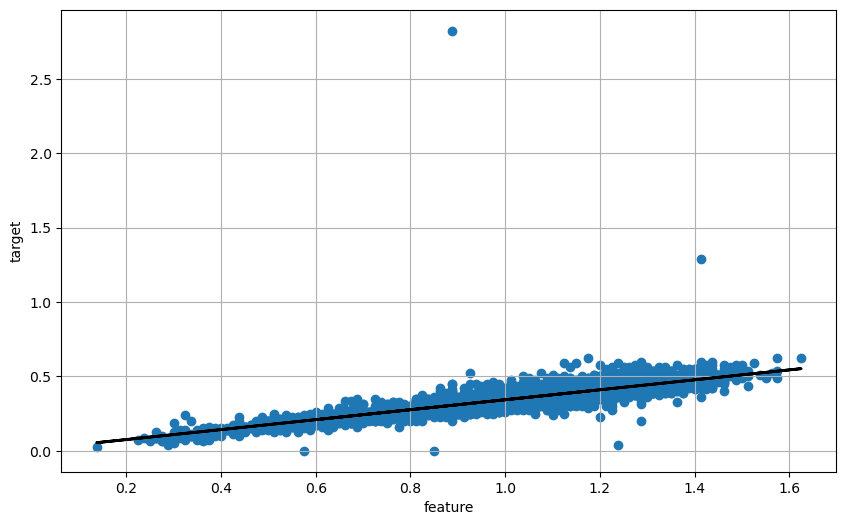

In [101]:
our_model_y = next_w1 * X + next_w0
plt.figure(figsize = (10,6))
plt.plot(X, our_model_y, linewidth = 2, color = "black")
plt.scatter(X, y)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

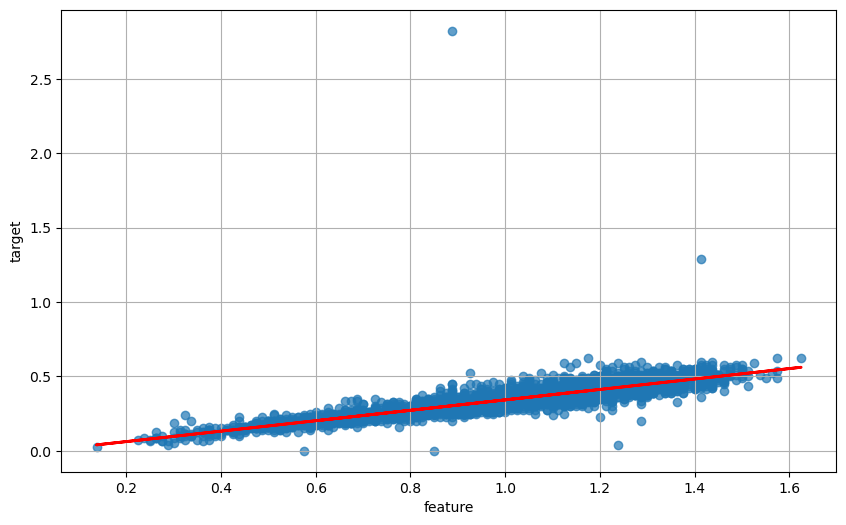

In [87]:
model_y_sk = model_a * X + model_b

fig = plt.figure(figsize=(10,6))
plt.plot(X, model_y_sk, linewidth=2, color = 'red')
plt.scatter(X, y, alpha=0.7)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

In [93]:
model_a = float(model.coef_)
model_b = float(model.intercept_)
next_w1 = float(next_w1)
next_w0 = float(next_w0)

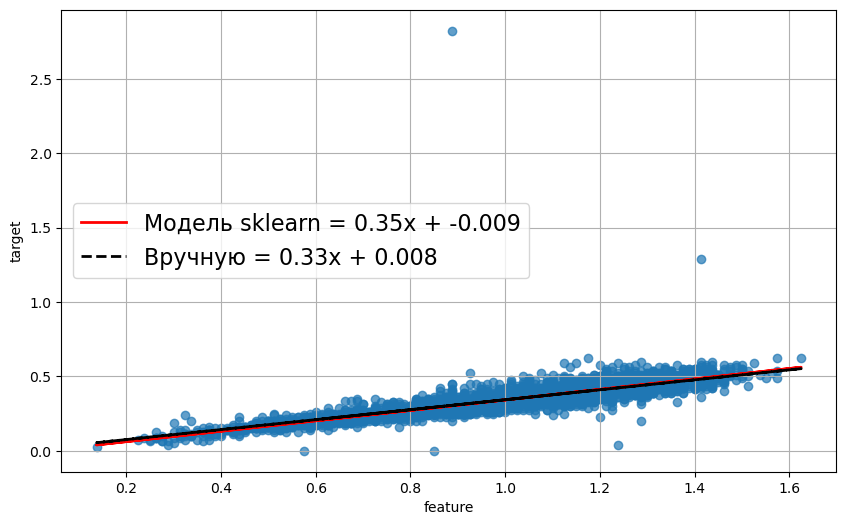

In [105]:
fig = plt.figure(figsize=(10,6))
plt.plot(X, model_y_sk, linewidth=2, color = 'red', label = f"Модель sklearn = {model_a:.2f}x + {model_b:.3f}")
plt.plot(X, our_model_y, color = 'black', linestyle = 'dashed', linewidth = 2, label = f"Вручную = {next_w1:.2f}x + {next_w0:.3f}")
plt.scatter(X, y, alpha=0.7)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size' : 16})
plt.show()

# Задание 3. 
### Загрузить данные: 'insurance.csv'.


In [10]:
data = pd.read_csv('insurance.csv', sep=',')

In [11]:
data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

### Вывести и провести предобработку.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Проверка на наличие дубликатов

In [13]:
data.duplicated().sum()

1

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().sum()

0

### Проверка на наличие пустых значениий

In [16]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Проверка на наличие неправильного формата записей

In [17]:
data.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [18]:
data.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [19]:
data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

### Проверка на наличие выбросов

<Axes: >

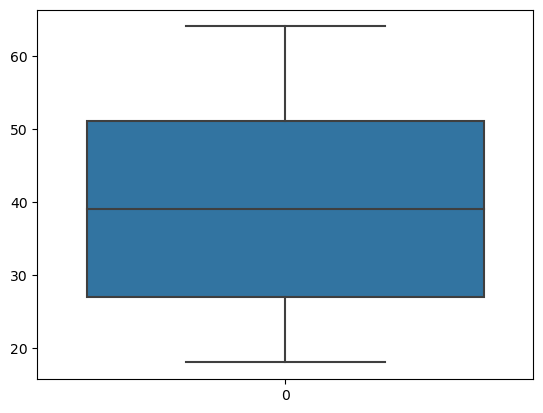

In [20]:
sns.boxplot(data=data.age)

<Axes: >

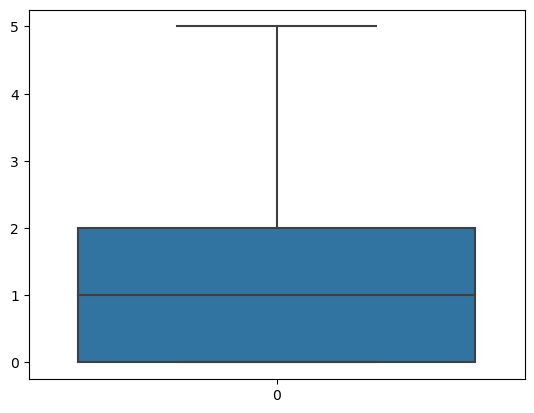

In [21]:
sns.boxplot(data=data.children)

<Axes: >

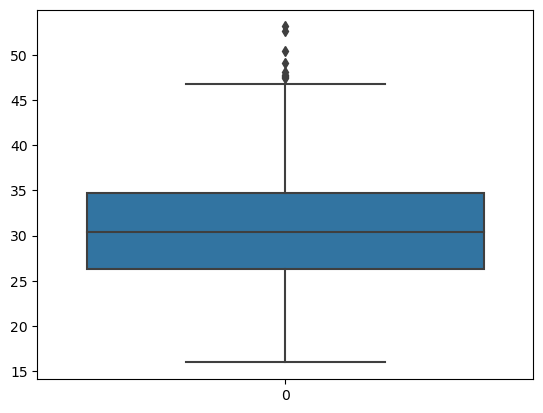

In [22]:
sns.boxplot(data=data.bmi)

<Axes: >

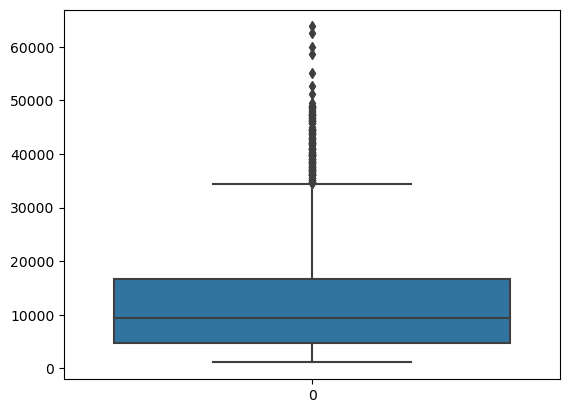

In [23]:
sns.boxplot(data=data.charges)

### Вывести список уникальных регионов

In [34]:
region = list(data.region.unique())
print(region)

['southwest', 'southeast', 'northwest', 'northeast']


### 3.1 Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя первый способ, через библиотеку Scipy.

In [35]:
groups = data.groupby("region")

sout_west = groups.get_group('southwest')['bmi']
sout_east = groups.get_group('southeast')['bmi']
north_west = groups.get_group('northwest')['bmi']
north_east = groups.get_group('northeast')['bmi']

In [36]:
sts.f_oneway(sout_east, sout_west, north_east, north_west)

F_onewayResult(statistic=39.48593864487439, pvalue=1.9087293927440606e-24)

### 3.2. Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels.

In [37]:
model = ols('bmi ~ region', data = data).fit()
sm.stats.anova_lm(model, typ = 2)

sum_sq      df          F        PR(>F)
region     4057.813904     3.0  39.485939  1.908729e-24
Residual  45662.381091  1333.0        NaN           NaN

### 3.3 С помощью t критерия Стьюдента перебрать все пары.

In [38]:
region_pairs = []

for region1 in range(5):
    for region2 in range(region1+1, 4):
        region_pairs.append((data.region.unique()[region1], data.region.unique()[region2]))

for region1, region2 in region_pairs:
    print(region1+'-'+region2)
    print(sts.ttest_ind(groups.get_group(region1)['bmi'], groups.get_group(region2)['bmi']), '\n')

southwest-southeast
Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09) 

southwest-northwest
Ttest_indResult(statistic=3.289593460501664, pvalue=0.0010577505931067947) 

southwest-northeast
Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573072) 

southeast-northwest
Ttest_indResult(statistic=9.252137489219615, pvalue=2.7504255547794223e-19) 

southeast-northeast
Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17) 

northwest-northeast
Ttest_indResult(statistic=0.05038637314068614, pvalue=0.9598300701853016) 



### Определить поправку Бонферрони.

In [39]:
bonferroni = 0.05 / len(region_pairs)
print(bonferroni)

0.008333333333333333


### 3.4 Выполнить пост-хок тесты Тьюки и построить график.

<class 'statsmodels.iolib.table.SimpleTable'>

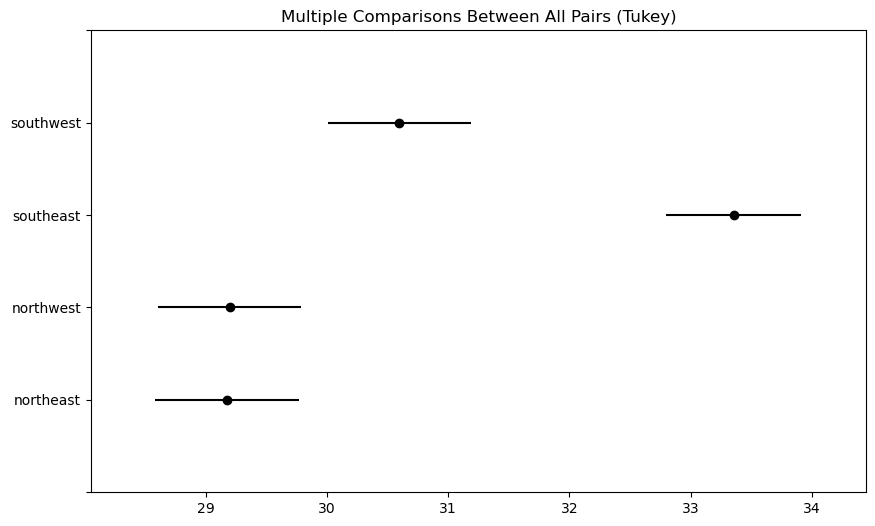

In [40]:
tukey = pairwise_tukeyhsd(data['bmi'], data['region'], 0.05)
tukey.plot_simultaneous()
tukey.summary()

### 3.5 Выполнить двухфакторный ANOVA тест, чтобы проверить влияниерегиона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.

In [41]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data).fit()
result = sm.stats.anova_lm(model, typ=2)
result

sum_sq      df          F        PR(>F)
C(region)          4036.141807     3.0  39.381780  2.215903e-24
C(sex)               85.359929     1.0   2.498643  1.141824e-01
C(region):C(sex)    175.040197     3.0   1.707917  1.635099e-01
Residual          45401.980965  1329.0        NaN           NaN

### 3.6 Выполнить пост-хок тесты Тьюки и построить график.

<class 'statsmodels.iolib.table.SimpleTable'>

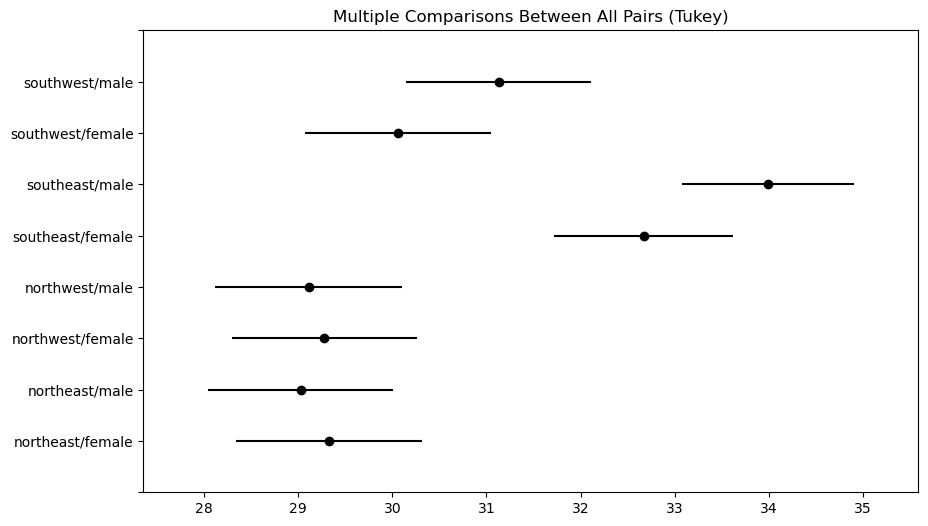

In [42]:
data['combination'] = data.region + '/' + data.sex
tukey = pairwise_tukeyhsd(data['bmi'], data['combination'], 0.05)
tukey.plot_simultaneous()
tukey.summary()